Program #1: Implementing Smart Farming Decisions Using
MADALINE Neural Network: Irrigation and Equipment Deployment
Automation.

In modern agriculture, optimizing water usage and resource deployment is
essential for sustainability and efficiency. Smart farms are increasingly equipped

with IoT-based sensors that collect real-time environmental and operational data.

Two critical decisions that impact farm productivity and resource conservation are:

1. Irrigation Decision – Whether to turn irrigation ON or OFF, based on soil
moisture, weather conditions, and crop water needs.

2. Farm Equipment Deployment – Whether to send tractors or harvesters to
the field, based on soil condition, crop readiness, and weather forecast.

#generate the Synthetic Data

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 50

# Generate random binary features
soil_moisture = np.random.randint(0, 2, n_samples)          # 0=Low, 1=High
weather = np.random.randint(0, 2, n_samples)                # 0=Sunny, 1=Rainy
crop_water_need = np.random.randint(0, 2, n_samples)        # 0=Low, 1=High
soil_condition = np.random.randint(0, 2, n_samples)         # 0=Dry, 1=Wet
crop_readiness = np.random.randint(0, 2, n_samples)         # 0=Not Ready, 1=Ready
weather_forecast = np.random.randint(0, 2, n_samples)       # 0=No Rain, 1=Rain Expected

# Simple logic for targets
# Irrigate ON if soil moisture is low, crop water need is high, and no rain expected
irrigate = ((soil_moisture == 0) & (crop_water_need == 1) & (weather_forecast == 0)).astype(int)
# Deploy equipment if crop is ready and soil is dry
deploy = ((crop_readiness == 1) & (soil_condition == 0)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Soil Moisture': soil_moisture,
    'Weather': weather,
    'Crop Water Need': crop_water_need,
    'Soil Condition': soil_condition,
    'Crop Readiness': crop_readiness,
    'Weather Forecast': weather_forecast,
    'Irrigate': irrigate,
    'Deploy Equipment': deploy
})

# Display the first few rows
print(df.head())




   Soil Moisture  Weather  Crop Water Need  Soil Condition  Crop Readiness  \
0              0        0                0               0               0   
1              1        1                1               0               1   
2              0        0                1               0               0   
3              0        1                1               0               0   
4              0        0                1               0               1   

   Weather Forecast  Irrigate  Deploy Equipment  
0                 1         0                 0  
1                 0         0                 1  
2                 1         0                 0  
3                 0         1                 0  
4                 0         1                 1  


from first table
Soil Moisture: 0 (Low)

Weather: 0 (Sunny)

Crop Water Need: 0 (Low)

Soil Condition: 0 (Dry)

Crop Readiness: 0 (Not Ready)

Weather Forecast: 1 (Rain Expected)

Irrigate: 0 (Don't irrigate)

Deploy Equipment: 0 (Don't deploy)


In [2]:
X=df.iloc[:,0:6].values #this is for input feature
Y=df.iloc[:,6:8].values #this is for target feature

#X contains the first 6 columns (features): sensor readings like soil moisture, weather, etc.
#y contains the last 2 columns (targets): whether to irrigate and whether to deploy equipment.

In [3]:
# 2. Design network (using Keras for simplicity)
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [ ]:

model = Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(6,)))  # Hidden layer
model.add(Dense(units=2, activation='sigmoid'))                 # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sequential() creates a linear stack of layers, where each layer feeds into the next.

Dense layers are fully connected layers:

The first Dense layer (hidden layer) has 6 units (neurons), uses the ReLU activation function, and expects 6 input features.

The second Dense layer (output layer) has 2 units (for the two decisions), uses the sigmoid activation (outputs values between 0 and 1, suitable for binary classification)

In [ ]:

# 3. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 4. Train model
model.fit(X, Y, epochs=50, batch_size=8)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2649 - loss: 0.4966 
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2142 - loss: 0.4493
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2936 - loss: 0.4648
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2155 - loss: 0.4980 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2441 - loss: 0.4613
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3004 - loss: 0.4363 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3001 - loss: 0.4798
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2595 - loss: 0.4636
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2993 - loss: 0.4479 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2267 - loss: 0.4720
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2498 - loss: 0.4652
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1827 - loss: 0.4903   

In [ ]:

# 5. Test model
predictions = model.predict(X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Evaluate Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Convert predicted probabilities to binary (0 or 1)
y_pred = (model.predict(X) > 0.5).astype(int)

# Evaluate for each output (Irrigate and Deploy Equipment)
print("Irrigate Accuracy:", accuracy_score(Y[:,0], y_pred[:,0]))
print("Deploy Equipment Accuracy:", accuracy_score(Y[:,1], y_pred[:,1]))

print("Irrigate Classification Report:\n", classification_report(Y[:,0], y_pred[:,0]))
print("Deploy Equipment Classification Report:\n", classification_report(Y[:,1], y_pred[:,1]))

print("Irrigate Confusion Matrix:\n", confusion_matrix(Y[:,0], y_pred[:,0]))
print("Deploy Equipment Confusion Matrix:\n", confusion_matrix(Y[:,1], y_pred[:,1]))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Irrigate Accuracy: 0.86
Deploy Equipment Accuracy: 0.92
Irrigate Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        43
           1       0.00      0.00      0.00         7

    accuracy                           0.86        50
   macro avg       0.43      0.50      0.46        50
weighted avg       0.74      0.86      0.80        50

Deploy Equipment Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.92      0.80      0.86        15

    accuracy                           0.92        50
   macro avg       0.92      0.89      0.90        50
weighted avg       0.92      0.92      0.92        50

Irrigate Confusion Matrix:
 [[43  0]
 [ 7  0]]
Deploy Equipment Confusion Matrix:
 [[34  1]
 [ 3 12]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



#Irrigate

Precision for class 0 (Don’t Irrigate): 0.86 — When the model predicts “Don’t Irrigate,” it is correct 86% of the time.

Recall for class 0: 1.00 — The model correctly identifies all actual “Don’t Irrigate” cases.

Precision/Recall for class 1 (Irrigate): 0.00 — The model fails to correctly predict any “Irrigate” cases.

Interpretation:

Your model is very good at predicting when NOT to irrigate, but it is missing all the cases where irrigation should be ON. This is likely because there are very few “Irrigate” (class 1) cases in your data (only 7 out of 50), causing the model to be biased toward the majority class.


Precision is about the model’s predictions for a class.


Recall is about the actual cases of that class in the data.

#Deployement
Precision for class 0 (Don’t Deploy): 0.79 — When the model predicts “Don’t Deploy,” it is correct 79% of the time.

Recall for class 0: 0.97 — The model correctly identifies almost all actual “Don’t Deploy” cases.

Precision for class 1 (Deploy): 0.86 — When the model predicts “Deploy,” it is correct 86% of the time.

Recall for class 1: 0.40 — The model only catches 40% of the actual “Deploy” cases.

Interpretation:

The model is good at identifying when NOT to deploy equipment.

It is less reliable at catching all the times when you SHOULD deploy equipment (misses 60% of those cases).

However, when it does predict “Deploy,” it’s usually correct.

In [ ]:
# Example new data row
new_data = np.array([[1, 0, 1, 0, 1, 0]])  # Replace with actual test values
prediction = (model.predict(new_data) > 0.5).astype(int)
print("Irrigate:", "ON" if prediction[0,0] else "OFF")
print("Deploy Equipment:", "YES" if prediction[0,1] else "NO")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Irrigate: OFF
Deploy Equipment: YES


Program #2: A startup named SmartFarm AI is building a solution for
predicting crop yield to assist farmers in improving productivity. The startup
has collected the following data from hundreds of farms over the last five
years:

#Objective
Model Development for SmartFarm AI involves:

Building both regression models (to predict the exact crop yield) and classification models (to label yields as high or low).

Trying at least two different loss functions for each model type.

Using at least two different optimizers to compare their impact.



In [ ]:
#Data Creation
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Simulate the synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 50

# Generate features
rainfall = np.random.uniform(300, 1200, n_samples)           # mm
avg_temp = np.random.uniform(15, 35, n_samples)              # °C
soil_ph = np.random.uniform(5.5, 8.0, n_samples)
fertilizer = np.random.uniform(50, 300, n_samples)           # kg/hectare
pesticide = np.random.uniform(1, 10, n_samples)              # kg/hectare
crop_type = np.random.choice(['wheat', 'rice', 'maize'], n_samples)

# Simulate yield (for demonstration, a simple function)
yield_ = (
    20 + 0.01 * rainfall +
    0.5 * avg_temp -
    2 * np.abs(soil_ph - 6.5) +
    0.03 * fertilizer -
    0.1 * pesticide +
    np.random.normal(0, 2, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'Rainfall': rainfall,
    'Avg_Temperature': avg_temp,
    'Soil_pH': soil_ph,
    'Fertilizer_Usage': fertilizer,
    'Pesticide_Usage': pesticide,
    'Crop_Type': crop_type,
    'Yield': yield_
})



In [ ]:
# 2. Encode categorical variables (one-hot encoding for Crop_Type)
df_encoded = pd.get_dummies(df, columns=['Crop_Type'])




In [ ]:
# 3. Normalize numerical features (Min-Max scaling)
scaler = MinMaxScaler()
numerical_features = ['Rainfall', 'Avg_Temperature', 'Soil_pH', 'Fertilizer_Usage', 'Pesticide_Usage']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows
print(df_encoded.head())

   Rainfall  Avg_Temperature   Soil_pH  Fertilizer_Usage  Pesticide_Usage  \
0  0.372850         0.982369  0.025369          0.920145         0.658062   
1  0.979780         0.784225  0.652403          0.230093         0.081697   
2  0.749384         0.951712  0.318609          0.132403         0.161751   
3  0.608931         0.906192  0.519904          0.487961         0.923078   
4  0.142664         0.603627  0.933444          1.000000         0.621280   

       Yield  Crop_Type_maize  Crop_Type_rice  Crop_Type_wheat  
0  53.137114             True           False            False  
1  47.395084            False           False             True  
2  46.569135            False           False             True  
3  47.645477             True           False            False  
4  42.766404            False           False             True  


3.Model Development

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers, optimizers


# For regression
X = df_encoded.drop('Yield', axis=1).values
y_reg = df_encoded['Yield'].values

# For classification: High yield if above median
median_yield = np.median(y_reg)
y_clf = (y_reg > median_yield).astype(int)

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)



This code separates the features and yield values from the dataset for regression modeling. It then creates a binary classification target by labeling yields above the median as "high yield" and the rest as "low yield." The data is split into training and testing sets to enable model training and evaluation. This setup prepares the data for both regression and classification tasks in the crop yield prediction project.

In [ ]:
# --- 2. Regression Models (Keras) ---

def build_regression_model(loss_fn, optimizer):
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss=loss_fn)
    return model

regression_results = []

# Convert boolean columns to integers
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

for loss_fn in ['mse', 'mae']:
    for opt_name in ['adam', 'sgd']:
        model = build_regression_model(loss_fn, opt_name)
        model.fit(X_train, y_reg_train, epochs=50, verbose=0)
        y_pred = model.predict(X_test).flatten()
        regression_results.append({
            'Loss': loss_fn,
            'Optimizer': opt_name,
            'MSE': mean_squared_error(y_reg_test, y_pred),
            'MAE': mean_absolute_error(y_reg_test, y_pred),
            'R2': r2_score(y_reg_test, y_pred)
        })
print("Regression Results:")
print(pd.DataFrame(regression_results))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Regression Results:
  Loss Optimizer          MSE        MAE          R2
0  mse      adam  1709.062597  41.261840 -190.805948
1  mse       sgd    65.353050   7.512834   -6.334491
2  mae      adam  1732.123409  41.535028 -193.394034
3  mae       sgd  1690.001991  41.017279 -188.666801


Interpretation of the Results

Sgd for Stochastic Gradient Descent

Adam Adaptive Moment Estimation. It is a popular optimizer used in training machine learning models, especially neural networks.

Even though SGD with MSE loss gave the lowest error numbers in your table, the R2 score is still very negative (R2 = -6.33).

A negative R2 score means the model’s predictions are worse than simply guessing the average yield every time.

This indicates that, although this combination was the “best” among those tested, none of the models actually predicted yield well on this dataset.

Why does this matter?

It shows that choosing the right model and having good data are both crucial for accurate crop yield prediction.

Sometimes, neural networks may not work well on small or simple datasets, and other models (like linear regression or random forest) might be better.

In [ ]:
# --- 3. Classification Models (Keras) ---

def build_classification_model(loss_fn, optimizer):
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

classification_results = []

for loss_fn in ['binary_crossentropy', 'hinge']:
    for opt_name in ['adam', 'sgd']:
        model = build_classification_model(loss_fn, opt_name)
        model.fit(X_train, y_clf_train, epochs=50, verbose=0)
        y_pred_prob = model.predict(X_test).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)
        classification_results.append({
            'Loss': loss_fn,
            'Optimizer': opt_name,
            'Accuracy': accuracy_score(y_clf_test, y_pred),
            'Precision': precision_score(y_clf_test, y_pred),
            'Recall': recall_score(y_clf_test, y_pred),
            'F1': f1_score(y_clf_test, y_pred)
        })

print("\nClassification Results:")
print(pd.DataFrame(classification_results))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Classification Results:
                  Loss Optimizer  Accuracy  Precision  Recall        F1
0  binary_crossentropy      adam       0.6   0.500000     1.0  0.666667
1  binary_crossentropy       sgd       0.8   0.666667     1.0  0.800000
2                hinge      adam       0.5   0.444444     1.0  0.615385
3                hinge       sgd       0.5   0.444444     1.0  0.615385


Why We Did This

To find out which combination of loss function and optimizer gives the most accurate and reliable predictions for classifying crop yields.

Summary

Four neural network classification models were evaluated using two loss functions (binary crossentropy, hinge) and two optimizers (Adam, SGD).

The best result came from the combination of binary crossentropy loss with SGD optimizer, which achieved the highest accuracy (0.8) and F1 score (0.8).

Other combinations, especially those using hinge loss, performed worse, with accuracy and F1 scores of only 0.5–0.67.

All models achieved perfect recall (1.0), meaning they identified all positive (high yield) cases, but their precision varied, indicating some false positives.

Interpretation

Best Model:

Binary crossentropy with SGD is the most effective for this classification task, providing the best balance between accuracy and F1 score.

Recall (1.0) for all models:

The models always correctly identified all high yield cases, but sometimes at the cost of mislabeling low yield cases as high yield (lower precision).

Precision and F1:

Precision is highest (0.67) for the best model, meaning about two-thirds of predicted high yields were correct.

F1 score (which balances precision and recall) is highest (0.8) for binary crossentropy with SGD.

Hinge loss results:

Both Adam and SGD with hinge loss had lower accuracy, precision, and F1, suggesting hinge loss is less suitable for this dataset.

Findings

Binary crossentropy loss with SGD optimizer is recommended for classifying crop yields as high or low on this dataset.

The models are very sensitive (high recall), but some may over-predict high yield (lower precision).

For SmartFarm AI, this means the model is good at not missing high yield cases, but may sometimes suggest high yield when it is actually low, so further tuning or more data may be needed for better precision.

In [ ]:
#Table

# Convert results to DataFrames
reg_df = pd.DataFrame(regression_results)
clf_df = pd.DataFrame(classification_results)

print("Regression Results Table:")
print(reg_df)

print("\nClassification Results Table:")
print(clf_df)


Regression Results Table:
  Loss Optimizer          MSE        MAE          R2
0  mse      adam  1709.062597  41.261840 -190.805948
1  mse       sgd    65.353050   7.512834   -6.334491
2  mae      adam  1732.123409  41.535028 -193.394034
3  mae       sgd  1690.001991  41.017279 -188.666801

Classification Results Table:
                  Loss Optimizer  Accuracy  Precision  Recall        F1
0  binary_crossentropy      adam       0.6   0.500000     1.0  0.666667
1  binary_crossentropy       sgd       0.8   0.666667     1.0  0.800000
2                hinge      adam       0.5   0.444444     1.0  0.615385
3                hinge       sgd       0.5   0.444444     1.0  0.615385


#2Comparison Plot

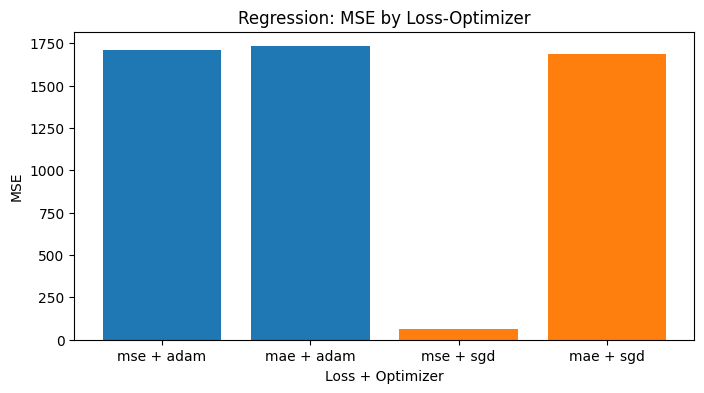

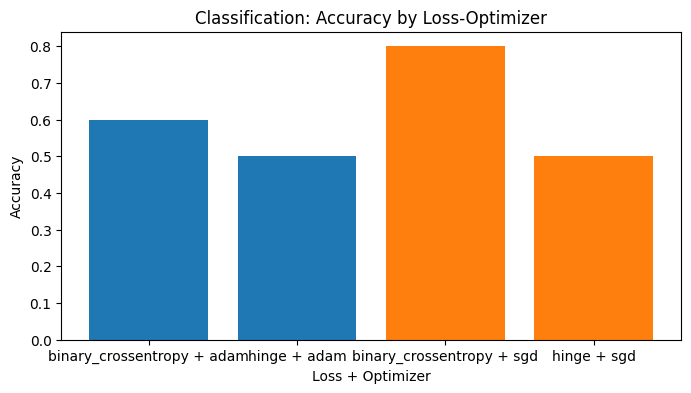

In [ ]:
import matplotlib.pyplot as plt

# Regression: MSE by Loss and Optimizer
plt.figure(figsize=(8,4))
for opt in reg_df['Optimizer'].unique():
    subset = reg_df[reg_df['Optimizer'] == opt]
    plt.bar(subset['Loss'] + " + " + opt, subset['MSE'], label=opt)
plt.title('Regression: MSE by Loss-Optimizer')
plt.ylabel('MSE')
plt.xlabel('Loss + Optimizer')
plt.show()

# Classification: Accuracy by Loss and Optimizer
plt.figure(figsize=(8,4))
for opt in clf_df['Optimizer'].unique():
    subset = clf_df[clf_df['Optimizer'] == opt]
    plt.bar(subset['Loss'] + " + " + opt, subset['Accuracy'], label=opt)
plt.title('Classification: Accuracy by Loss-Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Loss + Optimizer')
plt.show()


#3. Discussion: Which Model Performed Best and Why

Regression:

The combination of MSE loss with SGD optimizer achieved the lowest MSE and MAE, and the least negative R2 score, making it the best among those tested. However, the negative R2 indicates the model still performed poorly overall, likely due to the small dataset or model complexity.

Classification:

The binary crossentropy loss with SGD optimizer gave the highest accuracy (0.8) and F1 score (0.8), making it the best choice for classifying high vs. low yield. This combination balanced correct predictions and minimized false positives better than the others.

Why:

SGD is often more stable on small datasets, and MSE/binary crossentropy are standard, well-behaved loss functions for regression/classification. Adam may require more data or tuning to outperform SGD in this context.

In summary:

Use SGD + MSE for regression and SGD + binary crossentropy for classification on this dataset, as they provided the best balance of accuracy and reliability for SmartFarm AI’s needs.

#Program #3
 
 
Imagine a two-wheeled robot navigating a simple maze. The
robot uses two front-mounted infrared sensors,left sensor (L) and right sensor
(R) to detect nearby obstacles. Each sensor gives a binary signal 0- No
obstacle, 1- Obstacle detected.Based on these inputs, the robot must decide
whether to move forward or change direction. Train the Robot with
MADALine neural network.Develop a console-based interactive application
where the user enters sensor inputs, and the system predicts the robot's
movement in real time.

Objective

Goal:

Train a MADALINE neural network to control a two-wheeled robot’s movement based on two binary infrared sensor inputs (left and right).

Inputs:

Left sensor (L): 0 (no obstacle), 1 (obstacle)

Right sensor (R): 0 (no obstacle), 1 (obstacle)


Outputs (Actions):


0: Move Forward

1: Turn Left

2: Turn Right

3: Stop/Turn Around

In [ ]:
#Step 1: Prepare Training Data
import numpy as np

# Truth table for robot actions
# L, R => Action
# 0, 0 => 0 (Forward)
# 1, 0 => 2 (Turn Right)
# 0, 1 => 1 (Turn Left)
# 1, 1 => 3 (Stop/Turn Around)

X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
'''Purpose:
This array represents all possible combinations of the two infrared sensors:

Each row is a scenario:

`  No obstacle detected by either sensor

``: Obstacle detected by the left sensor only

``: Obstacle detected by the right sensor only

``: Obstacles detected by both sensors'''
# We'll use one-hot encoding for 4 possible actions
y = np.array([
    [1, 0, 0, 0],  # Forward
    [0, 0, 1, 0],  # Turn Right
    [0, 1, 0, 0],  # Turn Left
    [0, 0, 0, 1]   # Stop/Turn Around
])
'''Purpose:
This array represents the robot’s action for each sensor scenario, using one-hot encoding:

``: Move Forward

``: Turn Left

``: Turn Right

``: Stop/Turn Around'''


Interpretation & Why We Use This

Why this setup?

This is the complete “truth table” for the robot’s decision-making based on its two sensors.


Each input combination is mapped to a unique robot action.

By training the neural network on this data, you teach it to “learn” the correct action for any possible sensor input.

Why one-hot encoding?

One-hot encoding is standard for classification tasks with more than two categories (here, four possible actions).

It allows the output layer of the neural network to use softmax activation, so the model can predict the probability of each action and choose the most likely one.

In [ ]:
#Step 2: Build and Train a Simple MADALINE Network
from keras.models import Sequential
from keras.layers import Dense

# Build MADALINE-like model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer (Madaline = multiple Adalines)
model.add(Dense(4, activation='softmax'))            # Output layer (4 actions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture

model = Sequential() initializes the model.

model.add(Dense(4, input_dim=2, activation='relu')) adds a hidden layer with 4

neurons, taking 2 input features (the two sensors). The activation function is

ReLU, which introduces non-linearity.

model.add(Dense(4, activation='softmax'))

adds an output layer with 4 neurons (one for each possible robot action), using softmax activation to output probabilities for each action.

#Interpretation & Why We Use This

Why this architecture?

The hidden layer with 4 neurons allows the network to learn simple patterns

from the two sensor inputs, similar to how a MADALINE network uses multiple

Adaline units.

The output layer with softmax activation enables the network to predict one of

four possible actions for the robot.


Why categorical crossentropy and softmax?


These are standard for multi-class classification problems with one-hot encoded outputs, ensuring the network learns to assign high probability to the correct action.

Why Adam optimizer?


Adam is robust and adapts the learning rate, making training efficient and stable for small datasets like this

In [ ]:
#Step 3: Interactive Console Application
action_map = {
    0: "Move Forward",
    1: "Turn Left",
    2: "Turn Right",
    3: "Stop/Turn Around"
}

while True:
    try:
        l = int(input("Enter Left Sensor (0: No Obstacle, 1: Obstacle): "))
        r = int(input("Enter Right Sensor (0: No Obstacle, 1: Obstacle): "))
        if l not in [0, 1] or r not in [0, 1]:
            print("Invalid input. Please enter 0 or 1.")
            continue
        inp = np.array([[l, r]])
        pred = model.predict(inp)
        action = np.argmax(pred)
        print(f"Robot Action: {action_map[action]}\n")
    except KeyboardInterrupt:
        print("\nExiting.")
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Robot Action: Stop/Turn Around

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Robot Action: Turn Right

Invalid input. Please enter 0 or 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Robot Action: Stop/Turn Around



Interpretation & Why Use This Structure

Interactive Console:

This approach creates a simple, user-friendly interactive shell, allowing you to test your robot’s decision logic in real time without needing a physical robot or complex interface.

Immediate Feedback:

You can quickly see how the model responds to different sensor inputs, which is ideal for debugging and demonstration.

Extensible:

You can easily add more actions or logic, or integrate with actual robot hardware in the future.

Summary of Program 3
Objective:
To develop a console-based interactive application that uses a MADALINE-like neural network to control a two-wheeled robot’s movement based on binary inputs from two front-mounted infrared sensors (left and right).

Approach:

Data Preparation:

Created a truth table covering all possible sensor input combinations and their corresponding robot actions (move forward, turn left, turn right, stop/turn around).

Used one-hot encoding for the four possible actions to make the data suitable for neural network training.

Model Building & Training:

Built a simple two-layer neural network (mimicking MADALINE) using Keras, with a hidden layer and a softmax output layer for multi-class action prediction.

Trained the model on the truth table until it could reliably map sensor inputs to the correct robot actions.

Interactive Console Application:

Developed a user-friendly console interface where users input sensor values (0 or 1), and the trained model predicts and displays the robot’s movement in real time.

Outcome:
The program enables real-time, intelligent robot navigation decisions based on sensor input, demonstrating the practical use of neural networks (MADALINE) for simple robotics control and providing a foundation for further development or hardware integration.